# The NumPy Array Object

In [2]:
# The recommended convention to import numpy
import numpy as np

In [3]:
a = np.array([0, 1, 2, 4])
a

array([0, 1, 2, 4])

In [4]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.lib.Arrayterator
    Buffered iterator for big arrays.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.ma.MaskedArray.__new__
    Create a new masked array from scratch.
nu

In [5]:
np.con*?

np.concatenate
np.conj
np.conjugate
np.convolve

## Creating Arrays


In [6]:
# 2D
a = np.array([[0, 1, 2], [3, 4, 5]])
a

array([[0, 1, 2],
       [3, 4, 5]])

In [7]:
a.ndim

2

In [8]:
a.shape

(2, 3)

In [9]:
len(a) # returns the size of the first dimension

2

In [10]:
b = np.array([[[1], [2], [3], [4]]])
b

array([[[1],
        [2],
        [3],
        [4]]])

In [11]:
b.shape

(1, 4, 1)

In [12]:
c = np.array([[[1], [2]], [[3], [4]]])
c

array([[[1],
        [2]],

       [[3],
        [4]]])

In [13]:
c.shape

(2, 2, 1)

## Function for creating arrays

In practice, we rarely enter items one by one...

Evenly spaced:

In [14]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
np.arange(1, 9, 2) # start, end (exclusive), step

array([1, 3, 5, 7])

Or by number of points

In [16]:
np.linspace(0, 1, 6) # start, end, num-points

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [17]:
np.linspace(0, 1, 5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

Common arrays:

In [18]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [19]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [20]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
np.diag([1, 2, 3, 4, 5])

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

np.random: random numbers (Mersenne Twister PRNG):

In [22]:
# uniform in [0, 1]
np.random.rand(4) 

array([0.76623224, 0.84248744, 0.47938581, 0.0506061 ])

In [23]:
# Gaussian
np.random.randn(4) 

array([0.91019221, 0.65670953, 0.12765247, 0.79584719])

In [24]:
# Setting the random seed
np.random.seed(1234)

## Indexing and Slicing

In [25]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
a[0], a[2], a[-1]

(0, 2, 9)

The usual python idiom for reversing a sequence is supported:

In [27]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

For multidimensional arrays, indices are tuples of integers:

In [28]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [29]:
a[2, 1] = 10
a

array([[ 0,  0,  0],
       [ 0,  1,  0],
       [ 0, 10,  2]])

<div class="alert alert-block alert-info">
<b>Note:</b><br> 
1) In 2D, the first dimension corresponds to rows, the second to columns.<br>
2) for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.</div>

In [30]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Note that the last index is not included

In [32]:
a[:4]

array([0, 1, 2, 3])

All three slice components are not required: 
* start is 0
* end is the last
* step is 1

In [33]:
a[1:3]

array([1, 2])

In [34]:
a[::2]

array([0, 2, 4, 6, 8])

In [35]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

A small illustrated summary of Numpy indexing and slicing...

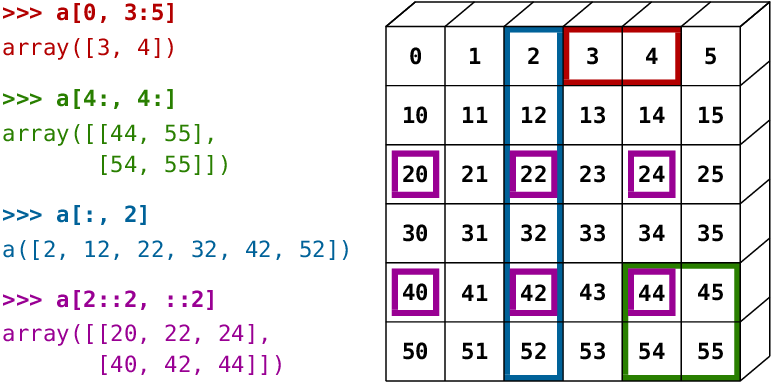

You can also combine assignment ans slicing:

In [36]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

## Copies and Views

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory. You can use `np.may_share_memory()` to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

**When modifying the view, the original array is modified as well**:

In [37]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [38]:
b = a[::2]
b

array([0, 2, 4, 6, 8])

In [39]:
np.may_share_memory(a, b)

True

In [40]:
b[0] = 12
a

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [41]:
a[0] = 0
b

array([0, 2, 4, 6, 8])

In [42]:
c = a[::2].copy()
c

array([0, 2, 4, 6, 8])

In [43]:
c[0] = 12
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Fancy Indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (**masks**). This method is called *fancy indexing*. It creates **copies not views**.

### Using boolean masks

In [44]:
np.random.seed(3)
a = np.random.randint(0, 21, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [45]:
(a % 3 == 0)

array([False,  True, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False])

In [46]:
mask = (a % 3 == 0)
extract_from_a = a[mask]
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

Indexing with a mask can be very useful to assign a new value to a sub-array:

In [47]:
a[a%3==0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Indexing with an array of integers

In [48]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

<code style="background:yellow;color:black">Indexing can be done with an array of integers, where the same index is repeated several time: </code>

In [49]:
a[[2, 3, 2, 4, 2]] # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

New values can be assigned with this kind of indexing:

In [ ]:
a[[9, 7]]